In [2]:
# import the package which we will use to programing
import os
import csv
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torchvision
import random
import matplotlib.pyplot as plt
import pandas as pd
import torch.optim as optim
import math
import multiprocessing
import time

from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from torchvision import datasets

In [3]:
# use gpu if you have
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device = mps_device)
    print ("MPS device is available. Successfully initiated:")
    print (x)
    device = mps_device
elif torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("GPU is available.")
    print("GPU device count:", torch.cuda.device_count())
    print("Current GPU device:", torch.cuda.current_device())
    print("GPU device name:", torch.cuda.get_device_name(torch.cuda.current_device()))
else:
    device = torch.device("cpu")
# device = torch.device("cpu")

print("Use device:",device)

# set random seed
SEED = int(time.time())
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
torch.backends.cudnn.deterministic = True
multiprocessing.set_start_method("fork")

MPS device is available. Successfully initiated:
tensor([1.], device='mps:0')
Use device: mps


In [4]:
train_transform = transforms.Compose([

    ##############################################################################
    #                    TODO: Write the transform functions                     #
    ##############################################################################

    ##### Try to apply the augmentation functions
    # transforms.Resize((5,24)),

    ##############################################################################
    #                              END OF YOUR CODE                              #
    ##############################################################################
    transforms.ToTensor(),

    ##############################################################################
    #                    TODO: Write the normalized functions                    #
    ##############################################################################

    ##### Try to apply the normalized functions
    transforms.Normalize(0.485, 0.229)

    ##############################################################################
    #                              END OF YOUR CODE                              #
    ##############################################################################

    ])

valid_transform = transforms.Compose([

    transforms.ToTensor(),

    ##############################################################################
    #                    TODO: Write the normalized functions                    #
    ##############################################################################

    ##### Try to apply the normalized functions
    transforms.Normalize(0.485, 0.229)

    ##############################################################################
    #                              END OF YOUR CODE                              #
    ##############################################################################
    ])

In [5]:
trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=train_transform)
test_set = datasets.FashionMNIST(root='./data', train=False, download=True, transform=valid_transform)

print('Number of total training dataset:', len(trainset))
print('Number of testing dataset:', len(test_set))

length = len(trainset)
n_TrainData = math.floor(length * 0.8)
n_ValidData = length - n_TrainData
print('Number of training data : ',n_TrainData)
print('Number of validation data : ', n_ValidData)

train_set, valid_set = torch.utils.data.random_split(
    trainset,
    [n_TrainData, n_ValidData],
    generator=torch.Generator().manual_seed(0)
)


class_num = 10
classes = ('T-shirt/top', ' Trouser', ' Pullover', ' Dress',
           ' Coat', ' Sandal', ' Shirt', ' Sneaker', ' Bag', 'Ankle boot')

Number of total training dataset: 60000
Number of testing dataset: 10000
Number of training data :  48000
Number of validation data :  12000


In [6]:
# Loaded Datasets to DataLoaders

##############################################################################
#                    TODO: Validation Dataloader                             #
##############################################################################

# please change the batch_size
trainloader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers = 0)
validloader = DataLoader(valid_set, batch_size=128, shuffle=False, num_workers = 0)
testloader = DataLoader(test_set, batch_size=128, shuffle=False, num_workers = 0)

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


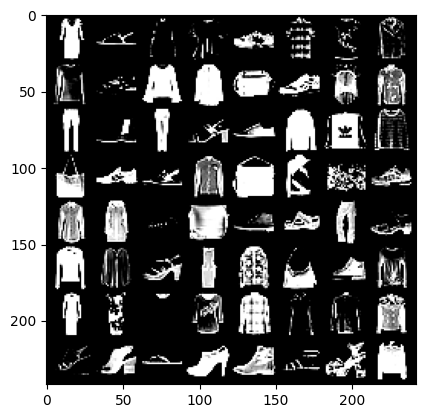

 Dress  Sandal


In [7]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(2)))

In [8]:
##############################################
# Build your model here!
#
# Practice:
#   Try to implement MLP with pytorch !
##############################################

class trainmodel(nn.Module):
    def __init__(self):
        super(trainmodel, self).__init__()


        self.conv_block = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2, stride=1),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),

        )

        self.feat_classifier = nn.Sequential(

            ##############################################################################
            #                    TODO: Complete the code                                 #
            ##############################################################################

            nn.Linear(in_features=16*5*5, out_features=224),
            nn.ReLU(),
            nn.Linear(in_features=224, out_features=120),
            nn.ReLU(),
            nn.Linear(in_features=120, out_features=84),
            nn.ReLU(),
            nn.Linear(in_features=84, out_features=10),
            ##############################################################################
            #                              END OF YOUR CODE                              #
            ##############################################################################

            nn.Softmax(dim=1)
        )

    def forward(self, x):

        ##############################################################################
        #                    TODO: Complete the code.                                #
        ##############################################################################

        # The shape of flatten output should be height * width * channel
        # x = x.view(-1, height * width * channel)

        x = self.conv_block(x)
        x = torch.flatten(x, 1)
        x = x.to(device)
        # print(x.shape)
        ##############################################################################
        #                              END OF YOUR CODE                              #
        ##############################################################################

        out = self.feat_classifier(x)
        return out

model = trainmodel()
model.to(device)


trainmodel(
  (conv_block): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (feat_classifier): Sequential(
    (0): Linear(in_features=400, out_features=224, bias=True)
    (1): ReLU()
    (2): Linear(in_features=224, out_features=120, bias=True)
    (3): ReLU()
    (4): Linear(in_features=120, out_features=84, bias=True)
    (5): ReLU()
    (6): Linear(in_features=84, out_features=10, bias=True)
    (7): Softmax(dim=1)
  )
)

In [9]:
x = torch.rand(1,28,28).to(device)
x = x.to(device)
out = model.conv_block(x)
# flat = model.forward(x)
out.shape

torch.Size([16, 5, 5])

In [22]:
##############################################################################
#                          TODO: Fill the parameters                         #
##############################################################################

batch_size = 64
channel = 1
height = 28
width = 28

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

result = model(torch.rand((batch_size, channel, height, width)).to(device))
print(result.shape)

torch.Size([64, 10])


In [23]:
## Use GPU
print(device)
model = model.to(device)
criterion = nn.CrossEntropyLoss()

##############################################################################
#                         TODO: Design the Parameters                        #
##############################################################################

learning_rate = 0.0002
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
epochs = 20

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

model.train()

mps


trainmodel(
  (conv_block): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (feat_classifier): Sequential(
    (0): Linear(in_features=400, out_features=224, bias=True)
    (1): ReLU()
    (2): Linear(in_features=224, out_features=120, bias=True)
    (3): ReLU()
    (4): Linear(in_features=120, out_features=84, bias=True)
    (5): ReLU()
    (6): Linear(in_features=84, out_features=10, bias=True)
    (7): Softmax(dim=1)
  )
)

In [24]:
# from torchsummary import summary
# summary(model, (1,28,28),device = "cpu")

In [25]:
WEIGHT_PATH = './weight/model_weight_2.pth'
checkpoint = torch.load(WEIGHT_PATH , map_location="mps")
model.load_state_dict(checkpoint)
device = torch.device("mps")

In [26]:
# Training model
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

# Specify the saving path
SAVING_PATH = './weight/'

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, epochs+1):# loop over the dataset multiple times

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    print('running epoch: {}'.format(epoch))

    # train the model
    model.train()
    train_correct = 0
    train_total = 0
    for data, target in tqdm(trainloader):
      # move tensors to GPU if CUDA is available
      data, target = data.to(device), target.to(device)
      # clear the gradients of all optimized variables
      optimizer.zero_grad()
      # forward pass: compute predicted outputs by passing inputs to the model
      output = model(data)
      # calculate the batch loss
      loss = criterion(output, target)
      # backward pass: compute gradient of the loss with respect to model parameters
      loss.backward()
      # perform a single optimization step (parameter update)
      optimizer.step()
      # update training loss
      train_loss += loss.item()*data.size(0)
      # update training Accuracy
      train_total += target.size(0)
      _, predicted = torch.max(output.data, 1)
      train_correct += (predicted == target).sum().item()


    # validate the model
    model.eval()
    valid_correct = 0
    valid_total = 0
    for data, target in tqdm(validloader):
        # move tensors to GPU if CUDA is available
        target = target.long()
        data, target = data.to(device), target.to(device)
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss
        valid_loss += loss.item()*data.size(0)
        # update validation Accuracy
        valid_total += target.size(0)
        _, predicted = torch.max(output.data, 1)
        valid_correct += (predicted == target).sum().item()
    # calculate average losses
    train_loss = train_loss/len(trainloader.dataset)
    valid_loss = valid_loss/len(validloader.dataset)

    # print training/validation statistics
    print('Training Loss: {:.6f} \tTraining Accuracy: {:.6f}'.format(train_loss,(100 * train_correct / train_total)))
    print('Validation Loss: {:.6f} \tValidation Accuracy: {:.6f}'.format(valid_loss,(100 * valid_correct / valid_total)))

    train_loss_list.append(train_loss)
    train_acc_list.append(100 * train_correct / train_total)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(100 * valid_correct / valid_total)

    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), SAVING_PATH+'/model_weight_2.pth')
        valid_loss_min = valid_loss

print('Finished Training')

running epoch: 1


  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Training Loss: 1.555299 	Training Accuracy: 90.602083
Validation Loss: 1.574735 	Validation Accuracy: 88.600000
Validation loss decreased (inf --> 1.574735).  Saving model ...
running epoch: 2


  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Training Loss: 1.554745 	Training Accuracy: 90.739583
Validation Loss: 1.576298 	Validation Accuracy: 88.458333
running epoch: 3


  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Training Loss: 1.552468 	Training Accuracy: 90.947917
Validation Loss: 1.572722 	Validation Accuracy: 88.808333
Validation loss decreased (1.574735 --> 1.572722).  Saving model ...
running epoch: 4


  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Training Loss: 1.552277 	Training Accuracy: 90.972917
Validation Loss: 1.577967 	Validation Accuracy: 88.291667
running epoch: 5


  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Training Loss: 1.552817 	Training Accuracy: 90.891667
Validation Loss: 1.571419 	Validation Accuracy: 88.958333
Validation loss decreased (1.572722 --> 1.571419).  Saving model ...
running epoch: 6


  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Training Loss: 1.549872 	Training Accuracy: 91.191667
Validation Loss: 1.572309 	Validation Accuracy: 88.825000
running epoch: 7


  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Training Loss: 1.550100 	Training Accuracy: 91.158333
Validation Loss: 1.569729 	Validation Accuracy: 89.158333
Validation loss decreased (1.571419 --> 1.569729).  Saving model ...
running epoch: 8


  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Training Loss: 1.548832 	Training Accuracy: 91.275000
Validation Loss: 1.569165 	Validation Accuracy: 89.091667
Validation loss decreased (1.569729 --> 1.569165).  Saving model ...
running epoch: 9


  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Training Loss: 1.547812 	Training Accuracy: 91.406250
Validation Loss: 1.567539 	Validation Accuracy: 89.275000
Validation loss decreased (1.569165 --> 1.567539).  Saving model ...
running epoch: 10


  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Training Loss: 1.545575 	Training Accuracy: 91.645833
Validation Loss: 1.571831 	Validation Accuracy: 88.775000
running epoch: 11


  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Training Loss: 1.544974 	Training Accuracy: 91.727083
Validation Loss: 1.572235 	Validation Accuracy: 88.891667
running epoch: 12


  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Training Loss: 1.544485 	Training Accuracy: 91.747917
Validation Loss: 1.567415 	Validation Accuracy: 89.366667
Validation loss decreased (1.567539 --> 1.567415).  Saving model ...
running epoch: 13


  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Training Loss: 1.543219 	Training Accuracy: 91.864583
Validation Loss: 1.568259 	Validation Accuracy: 89.150000
running epoch: 14


  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Training Loss: 1.541977 	Training Accuracy: 91.997917
Validation Loss: 1.569309 	Validation Accuracy: 89.141667
running epoch: 15


  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Training Loss: 1.542148 	Training Accuracy: 91.958333
Validation Loss: 1.570748 	Validation Accuracy: 89.000000
running epoch: 16


  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Training Loss: 1.540472 	Training Accuracy: 92.166667
Validation Loss: 1.573819 	Validation Accuracy: 88.633333
running epoch: 17


  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Training Loss: 1.539895 	Training Accuracy: 92.216667
Validation Loss: 1.571930 	Validation Accuracy: 88.825000
running epoch: 18


  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Training Loss: 1.539589 	Training Accuracy: 92.243750
Validation Loss: 1.564086 	Validation Accuracy: 89.641667
Validation loss decreased (1.567415 --> 1.564086).  Saving model ...
running epoch: 19


  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Training Loss: 1.538128 	Training Accuracy: 92.358333
Validation Loss: 1.566465 	Validation Accuracy: 89.425000
running epoch: 20


  0%|          | 0/750 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Training Loss: 1.537282 	Training Accuracy: 92.477083
Validation Loss: 1.565295 	Validation Accuracy: 89.500000
Finished Training


In [31]:
def plt_acc_all():
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title('All acc')

    ax1.plot(train_acc_list)
    ax1.plot(valid_acc_list)

    ax1.legend(['train_acc', 'valid_acc'], loc='upper left')
    ax1.set_xlabel('epoch')
    # plt.savefig("./weight/acc")
    plt.show()

def plt_loss_all():
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title('All loss')

    ax1.plot(train_loss_list)
    ax1.plot(valid_loss_list)

    ax1.legend(['train_loss', 'valid_loss'], loc='upper left')
    ax1.set_xlabel('epoch')
    # plt.savefig("./weight/loss")
    plt.show()

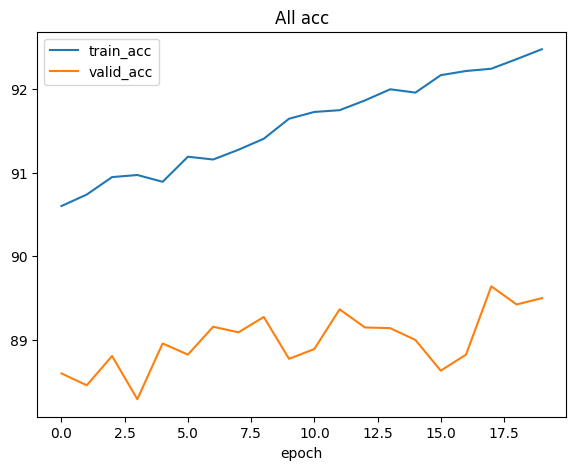

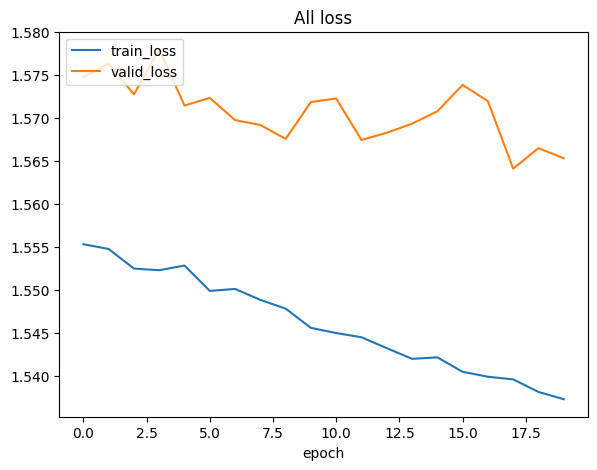

In [32]:
plt_acc_all()
plt_loss_all()

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %f %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 88.150000 %
